___


# Matplotlib

## Introducción

Matplotlib es la librería de visualización de datos por excelencia en Python. Fue creada por John Hunter para tratar de replicar las funcionalidades de visualización de MatLab en Python. Si usted está familiarizado con MatLab, matplotlib será sencillo para usted.

Es una excelente librería de gráficos 2D y 3D. Algunas de las principales ventajas de Matplotlib son:
* Es fácil comenzar a graficar
* Soporta etiquetas y textos personalizados
* Ofrece un gran control de todos los elementos de las figuras
* Salida de alta calidad en muchos formatos
* Muy personalizable

Matplotlib permite crear figuras reproducibles mediante programación. Ver la página web oficial de Matplotlib: http://matplotlib.org/

## Instalación 

Si aún no está instalada, puede intalar matplotlib así:

    conda install matplotlib
o

    pip install matplotlib
    
## Importar

Importar el módulo `matplotlib.pyplot` como `plt`:

In [1]:
import matplotlib.pyplot as plt

Para ver las figuras dentro del Notebook es necesario ejecutar también el siguiente comando:

In [2]:
%matplotlib inline

Tenga en cuenta que este comando es necesario sólo para Jupyter Notebooks. Si está usando otro editor, deberá usar: ** plt.show () ** al final de todos sus instrucciones de gráficas para que aparezca la figura en otra ventana.

# Ejemplo

Ejemplo sencillo usando 2 arreglos de NumPy. Se podrían usar también listas de Python, pero probablemente estaremos usando matplotlib con arreglos NumPy o columnas de DataFrames de Pandas.

** Construimos los datos que queremos graficar: **

In [3]:
import numpy as np
x = np.linspace(0, 5, 11) # 11 números entre 0 y 5, separados de forma uniforme
y = x ** 2

In [4]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [5]:
y

array([  0.  ,   0.25,   1.  ,   2.25,   4.  ,   6.25,   9.  ,  12.25,
        16.  ,  20.25,  25.  ])

## Comandos básicos de Matplotlib

Se recomienda hacer Shift+Tab para ver qué opciones poseen las funciones que usaremos.

Exiten 2 formas de trabajar con matplotlib: método funcional y método orientado a objetos.

### Método funcional

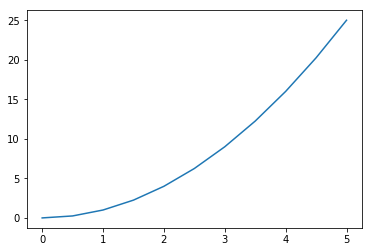

In [8]:
plt.plot(x, y)
#plt.show()    # Esto es equivalente a usar print(x) en el Notebook o simplemente escribir x

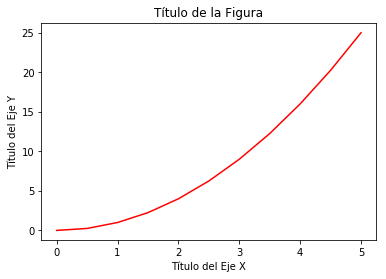

In [9]:
plt.plot(x, y, 'r') # 'r' es el color rojo (red)
plt.xlabel('Título del Eje X')
plt.ylabel('Título del Eje Y')
plt.title('Título de la Figura')
plt.show()


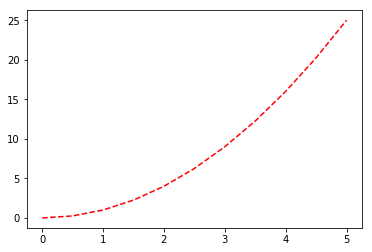

In [10]:
# Se pueden hacer modificaciones al estilo de MatLab:
plt.plot(x, y, 'r--')
#plt.plot(x, y, 'r*')

## Creación de múltiples figuras en el mismo canvas

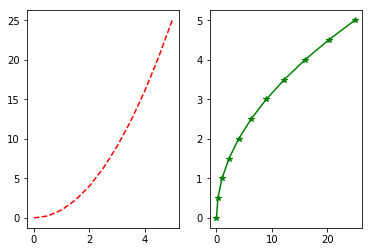

In [13]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

___
# Método orientado a objetos

Ahora que hemos visto lo básico, analicemos todo con una introducción más formal al método orientado a objetos de Matplotlib. 

La idea principal es crear objetos de Figura y luego simplemente invocar métodos o atributos de ese objeto. Este enfoque es más agradable cuando se trata de un canvas que tiene múltiples gráficos en él.

Para comenzar, creamos una instancia de figura. Luego, podemos agregar ejes a esa figura, así:

Text(0.5,1,'Título de la Figura')

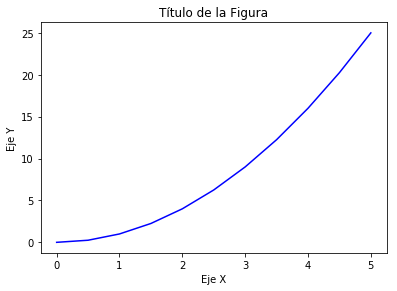

In [14]:
# Creamos una Figura (canvas vacío)
fig = plt.figure()

# Añadimos los ejes a la figura
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # izquierda, abajo, ancho, alto (rango de 0 a 1)

# Graficamos en esos ejes
axes.plot(x, y, 'b')
axes.set_xlabel('Eje X') # Nótese el uso de "set_" al principio del nombre de los métodos
axes.set_ylabel('Eje Y')
axes.set_title('Título de la Figura')

El código es un poco más complicado, pero la ventaja es que ahora tenemos control total de dónde están ubicados los ejes de la gráfica, y podemos agregar fácilmente más de un eje a la figura. Por ejemplo:

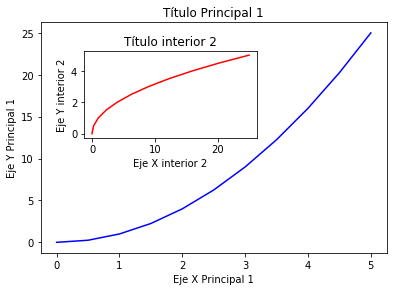

In [20]:
# Crea un canvas vacío
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # eje principal
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # eje interior


# Figure principal Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('Eje X Principal 1')
axes1.set_ylabel('Eje Y Principal 1')
axes1.set_title('Título Principal 1')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('Eje X interior 2')
axes2.set_ylabel('Eje Y interior 2')
axes2.set_title('Título interior 2');

## subplots()

El método plt.subplots() sirve como gestor automático de gráficos.

Casos de uso básicos:

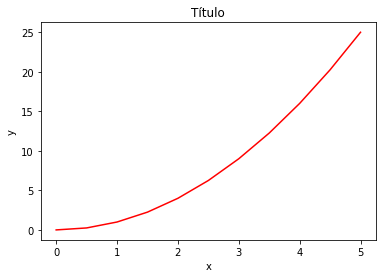

In [21]:
# Se usa de forma simular a plt.figure() excepto que devuelve al mismo tiempo un objeto Figura y un objeto (o un arreglo) de ejes
fig, axes = plt.subplots()

# Ahora se usa el eje, como antes, para graficar en él
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Título');

Se puede especificar el número de fils y columnas al llamar a subplots():

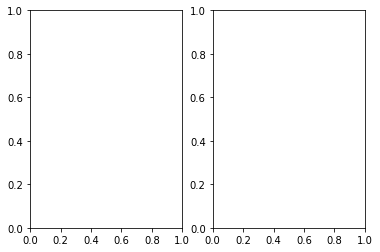

In [22]:
# Canvas vacío de 1x2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [24]:
# Axes es un arreglo de ejes sobre los cuales se puede graficar
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000366274CCC0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000036626676D8>], dtype=object)

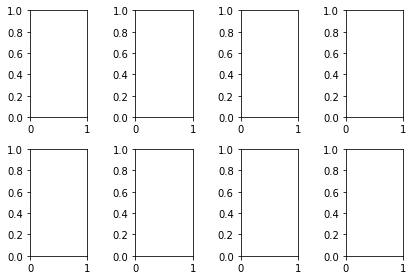

In [25]:
# Canvas vacío de 2x4 subplots
fig, axes = plt.subplots(nrows=2, ncols=4)
plt.tight_layout()

In [26]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000036625CEA90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000366112BB00>]], dtype=object)

Podemos iterar sobre este arreglo:

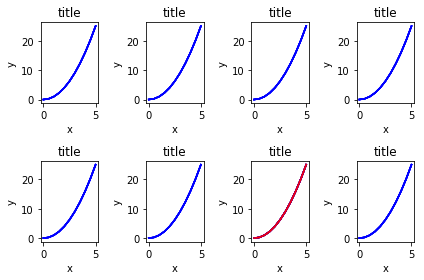

In [33]:
for row in axes:
    for ax in row:
        ax.plot(x, y, 'b')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('title')


axes[1,2].plot(x, y, 'r')

# Para mostrar la figura    
fig.tight_layout()
fig



Un problema común con matplolib es la superposición de gráficos. Podemos utilizar el método ** fig.tight_layout () ** o ** plt.tight_layout () ** para ajustar automáticamente las posiciones de los ejes en el canvas de la figura para que no haya contenido superpuesto.

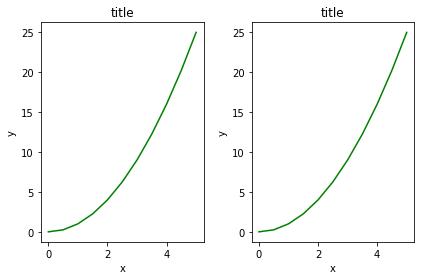

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig
plt.tight_layout()

____
## Tamaño de figuras y DPI (Dots per Inch)

Matplotlib permite especificar el DPI y el tamaño de la figura cuando se crea el objeto Figure. Para esto, se usan los argumentos de las palabras clave `figsize` y `dpi`.
* `figsize` es una tupla del ancho y alto de la figura en pulgadas
* `dpi` es el punto por pulgada (pixel por pulgada).

Por ejemplo:

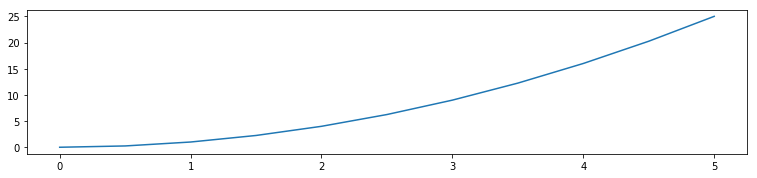

In [39]:
fig = plt.figure(figsize=(10,2))   #, dpi=100)

ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)

Estos mismo argumentos también se pueden pasar a los manejadores de layout, como el método `subplots`:

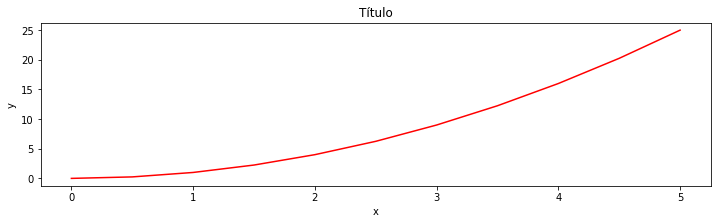

In [40]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Título');

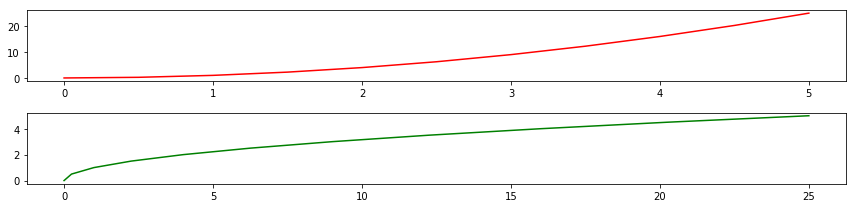

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,3))

axes[0].plot(x, y, 'r')
axes[1].plot(y, x, 'g')

plt.tight_layout()

____
## Guardar las Figuras como archivos

Matplotlib puede generar archivos de alta calidad en varios formatos, incluidos: PNG, JPG, EPS, SVG, PGF y PDF.

Para guardar una figura en un archivo, podemos usar el método `savefig` de la clase `Figure`:


In [48]:
fig.savefig("figura.png")

En este punto, también se puede especificar el DPI y escoger los formatos de salida:

In [49]:
fig.savefig("figura_dpi200.png", dpi=200)

In [50]:
# Generando un PDF
fig.savefig("figura.pdf",)

____

## Leyendas, etiquetas, títulos

Veamos cómo decorar una figura con títulos, etiquetas de ejes y leyendas.

**Títulos de Figuras**

Use el método `set_title` en el objeto `axes`:

In [52]:
ax.set_title("title");

**Etiquetas de ejes**

Use los métodos `set_xlabel` y `set_ylabel` para darle nombres a los ejes:

In [53]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Leyenda

Se puedde usar el parámetro **label="texto leyenda"** cuando se añaden plots u otros objetos a la Figura. Después, se llama al método **legend** para incluir la leyenda en el gráfico: 

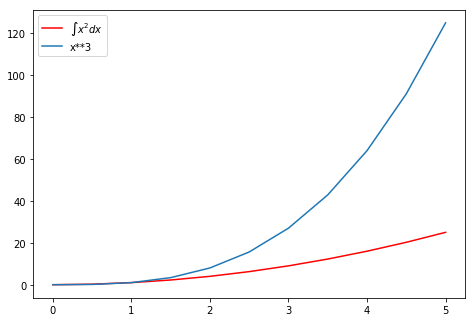

In [61]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, 'r', label="$\int x^2 d x$")
ax.plot(x, x**3, label="x**3")
ax.legend()

El método **legend** tiene un parámetro opcional **loc** que se usa para especificar la posición de la leyenda en la Figura. Soporta códigos númericos o la cadena directamente. Ver la documentación para conocer muchas más opciones: http://matplotlib.org/users/legend_guide.html#legend-location.

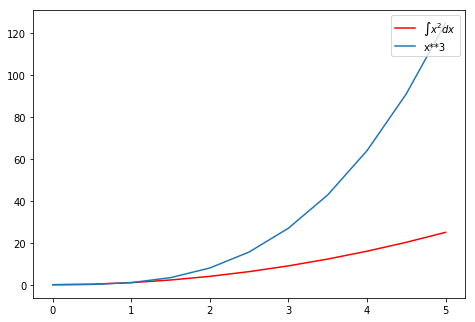

In [64]:
ax.legend(loc=1) # upper right 
#ax.legend(loc=2) # upper left 
#ax.legend(loc=3) # lower left 
#ax.legend(loc=4) # lower right

# Más común
#ax.legend(loc=0) # matplotlib decide la mejor posición

# Personalizado
#ax.legend(loc=(0.1,0.1))

fig

## Colores, ancho de líneas y tipo de líneas

Matplotlib ofrece *muchas* opciones para personalizar los colores, ancho de líneas y tipo de líneas. 

Matplotlib soporta una sintaxis básica similar a MatLab que sugerimos evitar en aras de la claridad:

### Sintaxis similar a MatLab

Con matplotlib, podemos definir los colores de las líneas y otros elementos gráficos de varias maneras. En primer lugar, podemos usar la sintaxis similar a MATLAB donde `'b'` significa azul, `'g'` significa verde, etc. También se pueden seleccionar estilos de línea: donde, por ejemplo, 'b.-' significa una línea azul con puntos:


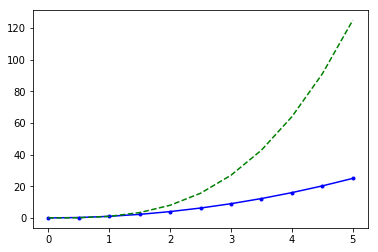

In [65]:
# Estilo MATLAB
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # línea azul (b) con puntos
ax.plot(x, x**3, 'g--') # línea punteada verde (g) 

### Colores usando el parámetro `color=`

También podemos definir colores por sus nombres o códigos hexadecimales RGB y, opcionalmente, proporcionar un valor alfa utilizando los argumentos de palabras clave `color` y `alfa`. Alpha indica opacidad.


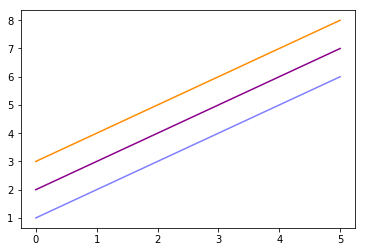

In [67]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # medio-transparente (alpha=0.5)
ax.plot(x, x+2, color="#8B008B")        # Código hexadecimal RGB (RGB Hex Code)
ax.plot(x, x+3, color="#FF8C00")        # Código hexadecimal RGB

### Estilos de líneas y marcadores

Para cambiar el ancho de línea se utiliza el parámetro `linewidth` (o simplemente `lw`). El estilo de línea se puede sellecionar mediante el argumento `linestyle` (o `ls`):

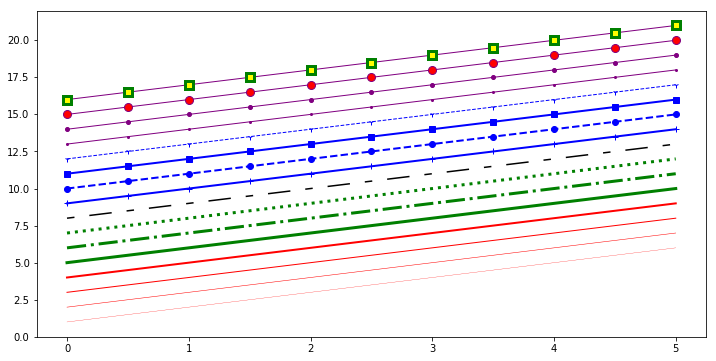

In [85]:
fig, ax = plt.subplots(figsize=(12,6))

# linewidth
ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# linestyle: ‘-‘, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# línea personalizada
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # formato: longitud de línea, longitud de espacio, ...

# marcadores: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=2, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=2, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=1, ls='--', marker='1')

# tamaño y color del marcador
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Control sobre la apariencia de los ejes

#### Rango 

Podemos configurar los rangos de los ejes usando los métodos `set_ylim` y `set_xlim` del objeto del eje, o llamando al método `axis ('tight')` para obtener automáticamente rangos de ejes "ajustados":

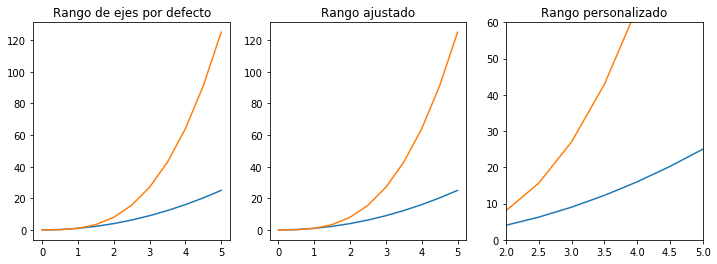

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2) # Se puede graficar sobre la misma figura llamando varias veces a plot()
axes[0].plot(x, x**3)
axes[0].set_title("Rango de ejes por defecto")

axes[1].plot(x, x**2, x, x**3) # Se puede hacer esto en una sola línea
axes[1].axis('tight')
axes[1].set_title("Rango ajustado")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("Rango personalizado");

# Tipos de gráficos especiales

Al igual que con Pandas, en Matplotlib se pueden crear varios tipos de gráficos: barplots, histogramas, scatter plots, y muchos más. La mayoría de estos gráficos los crearemos usando Seaborn, una librería para gráficos estadísticos para Python. Pero aquí se presentan algunos ejemplos con matplotlib:

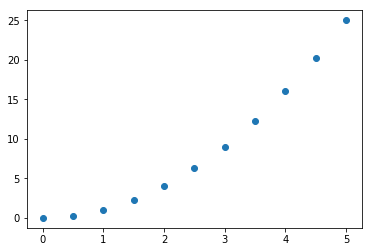

In [87]:
plt.scatter(x,y)

(array([  8.,  11.,  12.,   7.,  10.,  14.,   9.,  10.,  10.,   9.]),
 array([   1.,  100.,  199.,  298.,  397.,  496.,  595.,  694.,  793.,
         892.,  991.]),
 <a list of 10 Patch objects>)

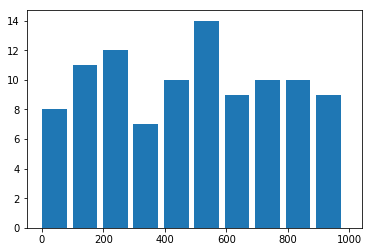

In [97]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data, width=80)

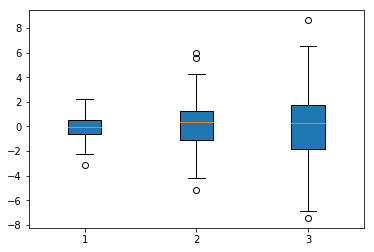

In [98]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# boxplot rectangular
plt.boxplot(data,vert=True,patch_artist=True);   

## Lecturas adicionales:

* http://www.matplotlib.org 
* http://matplotlib.org/gallery.html - Ejemplos - muy recomendado.
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/ - Excelente tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html 
